   idade  anos_experiencia  salario_real  salario_previsto
0     48                14         11000      11159.262760
1     25                 3          3000       4115.626969
2     23                 4         11000       4115.626969
3     23                 6         30000       4115.626969
4     34                 7         34000       4115.626969
   idade  anos_experiencia  salario_real  salario_previsto
0     48                14         11000      11159.262760
1     25                 3          3000       4115.626969
2     23                 4         11000       4115.626969
3     23                 6         30000       4115.626969
4     34                 7         34000       4115.626969
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             9 non-null      int64  
 1   anos_experiencia  9 non-null      int64  
 2  

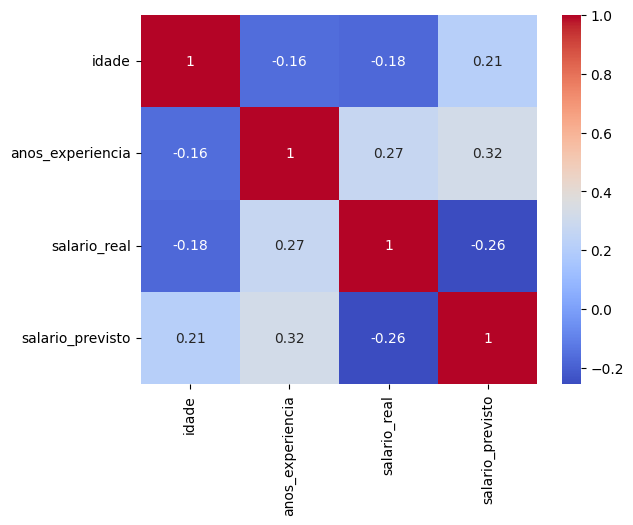

=== AVALIAÇÃO REGRESSÃO LINEAR ===
R²: -22.084027830656083
RMSE: 48045.84043458506

=== AVALIAÇÃO CLASSIFICAÇÃO RANDOM FOREST ===
Acurácia: 0.0
              precision    recall  f1-score   support

        3000       0.00      0.00      0.00       1.0
       11000       0.00      0.00      0.00       0.0
       23000       0.00      0.00      0.00       1.0
       34000       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

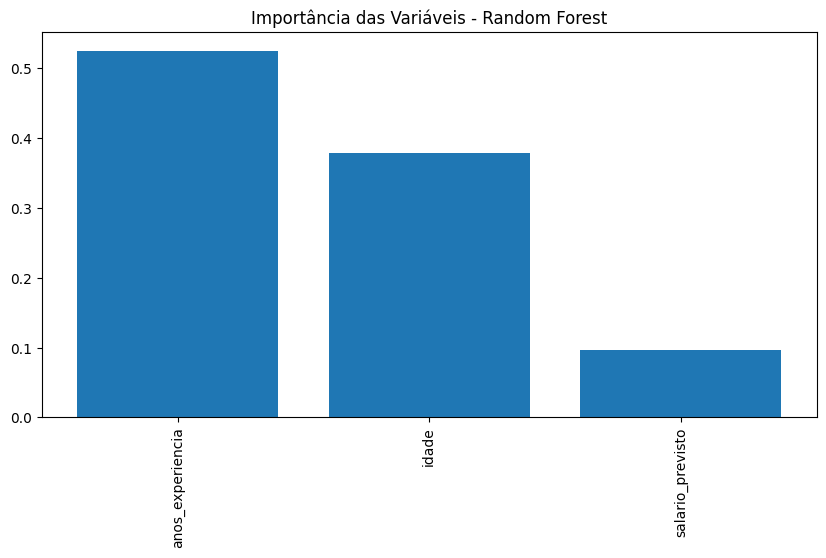

✅ Modelo salvo como modelo_preditivo.pkl
✅ Previsões salvas em previsoes_modelo.xlsx


In [8]:
# ETAPAS PARA CRIAR MODELOS PREDITIVOS
# ================================================

#  Carregar os dados tratados
import pandas as pd

# Load the treated data (replace with your file)
df = pd.read_excel("dados_tratados.xlsx")
print(df.head())

# View first rows and general information
print(df.head())
print(df.info())


#  Exploratory and statistical analysis
# ================================================
print(df.describe())               # Descriptive statistics
print(df.isnull().sum())            # Check for null values

# Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

#  Define target variable and predictors
# ================================================
# Replace 'alvo' with the column you want to predict
y = df['salario_real']               # Dependent variable
X = df.drop(columns=['salario_real']) # Independent variables

# Transform categorical variables into numerical
X = pd.get_dummies(X, drop_first=True)


# Separate data into training and testing
# ================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Choose the type of model
#  Example 1: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

modelo_reg = LinearRegression()
modelo_reg.fit(X_train, y_train)

y_pred_reg = modelo_reg.predict(X_test)

print("=== AVALIAÇÃO REGRESSÃO LINEAR ===")
print("R²:", r2_score(y_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))

#  Example 2: Classification with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

modelo_clf = RandomForestClassifier(random_state=42)
modelo_clf.fit(X_train, y_train)

y_pred_clf = modelo_clf.predict(X_test)

print("\n=== AVALIAÇÃO CLASSIFICAÇÃO RANDOM FOREST ===")
print("Acurácia:", accuracy_score(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))


#  Adjust and validate (optional)
# ================================================
# Variable importance in the classification model
importances = modelo_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importância das Variáveis - Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


# Save the trained model and predictions
# ================================================
import joblib

# Salvar classification model
joblib.dump(modelo_clf, "modelo_preditivo.pkl")

# Create Excel with Linear Regression predictions
df_resultados = X_test.copy()
df_resultados['y_real'] = y_test
df_resultados['y_previsto'] = y_pred_reg
df_resultados.to_excel("previsoes_modelo.xlsx", index=False)

print("✅ Modelo salvo como modelo_preditivo.pkl")
print("✅ Previsões salvas em previsoes_modelo.xlsx")